In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('./data/clean/halving_02_to_04.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92282 entries, 0 to 92281
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                92282 non-null  object 
 1   symbol              92282 non-null  object 
 2   date                92282 non-null  object 
 3   rank                92282 non-null  float64
 4   market_cap          92282 non-null  float64
 5   price               92282 non-null  float64
 6   circulating_supply  92282 non-null  float64
 7   volume_24h          92282 non-null  float64
 8   %1h                 92282 non-null  float64
 9   %7h                 92282 non-null  float64
 10  %24h                92282 non-null  float64
 11  class               92282 non-null  float64
 12  ismultiplatform     92282 non-null  float64
dtypes: float64(10), object(3)
memory usage: 9.2+ MB


In [4]:
data.isnull().sum()

name                  0
symbol                0
date                  0
rank                  0
market_cap            0
price                 0
circulating_supply    0
volume_24h            0
%1h                   0
%7h                   0
%24h                  0
class                 0
ismultiplatform       0
dtype: int64

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

In [6]:
data['year_group'] = (data['year'] // 4) * 4
grouped_data = data.groupby(['symbol', 'year_group'])


In [7]:
from scipy.stats import kurtosis, skew, shapiro
from statsmodels.stats.stattools import durbin_watson
def calculate_features(group):
    group = group.sort_values(by='date')

    if len(group) < 3:
        return pd.Series({
            'market_cap_mean': np.nan,
            'market_cap_std': np.nan,
            'market_cap_min': np.nan,
            'market_cap_max': np.nan,
            'market_cap_iqr': np.nan,
            'market_cap_kurt': np.nan,
            'market_cap_skew': np.nan,

            'price_mean': np.nan,
            'price_std': np.nan,
            'price_min': np.nan,
            'price_max': np.nan,
            'price_iqr': np.nan,
            'price_kurt': np.nan,
            'price_skew': np.nan,

            'circulating_supply_mean': np.nan,
            'circulating_supply_std': np.nan,
            'circulating_supply_min': np.nan,
            'circulating_supply_max': np.nan,
            'circulating_supply_iqr': np.nan,
            'circulating_supply_kurt': np.nan,
            'circulating_supply_skew': np.nan,

            'volume_24h_mean': np.nan,
            'volume_24h_std': np.nan,
            'volume_24h_min': np.nan,
            'volume_24h_max': np.nan,
            'volume_24h_iqr': np.nan,
            'volume_24h_kurt': np.nan,
            'volume_24h_skew': np.nan,

            '%1h_mean': np.nan,
            '%7h_mean': np.nan,
            '%24h_mean': np.nan,
            'rank_mean': np.nan,
            'class': np.nan,
            'ismultiplatform': np.nan,

            'price_volatility': np.nan,
            'daily_return_mean': np.nan,
            'daily_return_std': np.nan,
            
            'price_normality_pvalue': np.nan,
            'price_autocorrelation': np.nan
        })

    returns = group['price'].pct_change().dropna()


    features = {
        'market_cap_mean': group['market_cap'].mean(),
        'market_cap_std': group['market_cap'].std(),
        'market_cap_min': group['market_cap'].min(),
        'market_cap_max': group['market_cap'].max(),
        'market_cap_iqr': np.subtract(*np.percentile(group['market_cap'], [75, 25])),
        'market_cap_kurt': kurtosis(group['market_cap']),
        'market_cap_skew': skew(group['market_cap']),


        'price_mean': group['price'].mean(),
        'price_std': group['price'].std(),
        'price_min': group['price'].min(),
        'price_max': group['price'].max(),
        'price_iqr': np.subtract(*np.percentile(group['price'], [75, 25])),
        'price_kurt': kurtosis(group['price']),
        'price_skew': skew(group['price']),

        'circulating_supply_mean': group['circulating_supply'].mean(),
        'circulating_supply_std': group['circulating_supply'].std(),
        'circulating_supply_min': group['circulating_supply'].min(),
        'circulating_supply_max': group['circulating_supply'].max(),
        'circulating_supply_iqr': np.subtract(*np.percentile(group['circulating_supply'], [75, 25])),
        'circulating_supply_kurt': kurtosis(group['circulating_supply']),
        'circulating_supply_skew': skew(group['circulating_supply']),


        'volume_24h_mean': group['volume_24h'].mean(),
        'volume_24h_std': group['volume_24h'].std(),
        'volume_24h_min': group['volume_24h'].min(),
        'volume_24h_max': group['volume_24h'].max(),
        'volume_24h_iqr': np.subtract(*np.percentile(group['volume_24h'], [75, 25])),
        'volume_24h_kurt': kurtosis(group['volume_24h']),
        'volume_24h_skew': skew(group['volume_24h']),


        '%1h_mean': group['%1h'].mean(),
        '%7h_mean': group['%7h'].mean(),
        '%24h_mean': group['%24h'].mean(),
        'rank_mean': group['rank'].mean(),
        'class': group['class'].iloc[0],
        'ismultiplatform': group['ismultiplatform'].iloc[0],

        'price_volatility': returns.std(),
        'daily_return_mean': returns.mean(),
        'daily_return_std': returns.std(),
        
        'price_normality_pvalue': shapiro(group['price'])[1],
        'price_autocorrelation': durbin_watson(group['price'] - group['price'].mean())
    }
    return pd.Series(features)


features_data = grouped_data.apply(calculate_features).reset_index()
features_data.head()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_8180\492297712.py:82: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'circulating_supply_kurt': kurtosis(group['circulating_supply']),
C:\Users\Joseph\AppData\Local\Temp\ipykernel_8180\492297712.py:83: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'circulating_supply_skew': skew(group['circulating_supply']),
C:\Users\Joseph\AppData\Local\Temp\ipykernel_8180\492297712.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'price_kurt': kurtosis(group['price']),
C:\Users\Joseph\AppData\Local\Temp\ipykernel_8180\492297712.py:75: RuntimeWarning: Precision loss occurred in mo

,symbol,year_group,market_cap_mean,market_cap_std,market_cap_min,market_cap_max,market_cap_iqr,market_cap_kurt,market_cap_skew,price_mean,...,%7h_mean,%24h_mean,rank_mean,class,ismultiplatform,price_volatility,daily_return_mean,daily_return_std,price_normality_pvalue,price_autocorrelation
0,$$$,2016,-0.029565,7.115937e-08,-0.029565,-0.029565,1.228359e-07,-0.761250,0.680410,-0.047061,...,0.003046,-0.006186,-0.527783,4.0,0.0,1.359147e-07,-1.223350e-08,1.359147e-07,0.001708,0.566545
1,$ANRX,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$MONG,2020,-0.029116,4.584747e-05,-0.029150,-0.029050,4.274933e-05,-0.896177,0.903811,-0.047061,...,-0.073152,-0.110715,0.174104,4.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,NaN
3,$MONG,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$NOOB,2020,-0.029559,5.548297e-06,-0.029563,-0.029545,4.518577e-06,1.881266,1.636645,-0.045351,...,-0.115325,-0.018598,1.838900,4.0,0.0,3.407049e-02,2.320220e-03,3.407049e-02,0.010803,1.061203


In [8]:
features_data.isnull().sum()*100/features_data.shape[0]

symbol                      0.000000
year_group                  0.000000
market_cap_mean            36.215461
market_cap_std             36.215461
market_cap_min             36.215461
market_cap_max             36.215461
market_cap_iqr             36.215461
market_cap_kurt            36.215461
market_cap_skew            36.215461
price_mean                 36.215461
price_std                  36.215461
price_min                  36.215461
price_max                  36.215461
price_iqr                  36.215461
price_kurt                 36.370692
price_skew                 36.370692
circulating_supply_mean    36.215461
circulating_supply_std     36.215461
circulating_supply_min     36.215461
circulating_supply_max     36.215461
circulating_supply_iqr     36.215461
circulating_supply_kurt    39.909966
circulating_supply_skew    39.909966
volume_24h_mean            36.215461
volume_24h_std             36.215461
volume_24h_min             36.215461
volume_24h_max             36.215461
v

In [9]:
features_data.dropna(inplace=True)
features_data.shape

(3871, 41)

In [10]:
features_data

,symbol,year_group,market_cap_mean,market_cap_std,market_cap_min,market_cap_max,market_cap_iqr,market_cap_kurt,market_cap_skew,price_mean,...,%7h_mean,%24h_mean,rank_mean,class,ismultiplatform,price_volatility,daily_return_mean,daily_return_std,price_normality_pvalue,price_autocorrelation
4,$NOOB,2020,-0.029559,5.548297e-06,-0.029563,-0.029545,4.518577e-06,1.881266,1.636645,-0.045351,...,-0.115325,-0.018598,1.838900,4.0,0.0,3.407049e-02,2.320220e-03,3.407049e-02,1.080271e-02,1.061203
6,020,2016,-0.029564,5.765917e-07,-0.029564,-0.029562,3.163695e-07,5.845210,2.564836,-0.047061,...,0.336214,-0.016526,-0.773828,4.0,0.0,5.862786e-10,-3.010839e-11,5.862786e-10,1.895688e-04,1.775573
8,0x0,2020,-0.025543,5.363706e-04,-0.026213,-0.024919,4.876046e-04,-1.102778,-0.139633,-0.047036,...,-0.105974,-0.026648,-0.660232,0.0,0.0,1.571388e-04,9.668258e-06,1.571388e-04,9.706938e-01,3.269777
10,0xBTC,2020,-0.029475,3.309604e-05,-0.029512,-0.029351,2.840814e-05,5.804464,2.321437,-0.046979,...,0.012334,-0.035970,0.256827,4.0,0.0,3.893893e-04,-6.124747e-05,3.893893e-04,9.749775e-06,0.297004
14,1337,2016,-0.029561,1.818210e-06,-0.029564,-0.029557,2.370868e-06,-0.637790,0.256426,-0.047061,...,-0.067596,-0.026568,-0.863741,4.0,0.0,3.026959e-08,3.593222e-09,3.026959e-08,1.353878e-04,0.557722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,mVIXY,2020,-0.029247,8.295203e-05,-0.029314,-0.029094,9.299924e-05,-0.454687,0.995382,-0.037749,...,-0.026426,-0.017174,0.206827,4.0,0.0,4.149138e-02,-1.774670e-02,4.149138e-02,1.389930e-04,1.171581
6435,onLEXpa,2020,-0.029526,1.804336e-04,-0.029565,-0.028679,1.212848e-06,19.042121,4.587085,-0.047060,...,0.381678,2.532404,1.832030,4.0,0.0,1.654199e-04,2.724590e-08,1.654199e-04,2.303305e-10,2.081933
6436,stETH,2020,1.545829,1.051397e-02,1.533563,1.558706,1.041751e-02,-1.172199,0.091437,0.942874,...,-0.043199,-0.063578,-1.028147,4.0,0.0,1.571826e-02,-1.088240e-02,1.571826e-02,4.883428e-01,1.417451
6440,xBTC,2020,-0.029370,9.859426e-05,-0.029479,-0.029108,6.938806e-05,1.022699,1.301045,-0.046702,...,0.006825,-0.042630,0.392131,4.0,0.0,1.427255e-03,4.273902e-05,1.427255e-03,1.652779e-01,0.675345


In [11]:
def calculate_target(data):
    condition = (
        (data['market_cap_mean'] * (1 + data['price_mean'] / 100) > data['market_cap_mean']) &
        (data['price_volatility'] > 0.1) 
    )
    
    data['target'] = condition.astype(int)
    
    data['target'] = data['target']
    
    return data

In [12]:
data_with_target = calculate_target(features_data)

In [13]:
data_with_target['class'] = data_with_target['class'].map({4.0: 1, 0.0: 0})

In [14]:
data_with_target.head()

,symbol,year_group,market_cap_mean,market_cap_std,market_cap_min,market_cap_max,market_cap_iqr,market_cap_kurt,market_cap_skew,price_mean,...,%24h_mean,rank_mean,class,ismultiplatform,price_volatility,daily_return_mean,daily_return_std,price_normality_pvalue,price_autocorrelation,target
4,$NOOB,2020,-0.029559,5.548297e-06,-0.029563,-0.029545,4.518577e-06,1.881266,1.636645,-0.045351,...,-0.018598,1.838900,1,0.0,3.407049e-02,2.320220e-03,3.407049e-02,0.010803,1.061203,0
6,020,2016,-0.029564,5.765917e-07,-0.029564,-0.029562,3.163695e-07,5.845210,2.564836,-0.047061,...,-0.016526,-0.773828,1,0.0,5.862786e-10,-3.010839e-11,5.862786e-10,0.000190,1.775573,0
8,0x0,2020,-0.025543,5.363706e-04,-0.026213,-0.024919,4.876046e-04,-1.102778,-0.139633,-0.047036,...,-0.026648,-0.660232,0,0.0,1.571388e-04,9.668258e-06,1.571388e-04,0.970694,3.269777,0
10,0xBTC,2020,-0.029475,3.309604e-05,-0.029512,-0.029351,2.840814e-05,5.804464,2.321437,-0.046979,...,-0.035970,0.256827,1,0.0,3.893893e-04,-6.124747e-05,3.893893e-04,0.000010,0.297004,0
14,1337,2016,-0.029561,1.818210e-06,-0.029564,-0.029557,2.370868e-06,-0.637790,0.256426,-0.047061,...,-0.026568,-0.863741,1,0.0,3.026959e-08,3.593222e-09,3.026959e-08,0.000135,0.557722,0


In [15]:
data_with_target['year_group'].value_counts()

year_group
2020    3409
2016     457
2024       5
Name: count, dtype: int64

In [16]:
data_with_target.groupby('target').size()

target
0    3799
1      72
dtype: int64

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [18]:
X = data_with_target.drop(columns=['symbol', 'year_group', 'target' ])
y = data_with_target['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
print(X_train.columns[selector.get_support()])

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


Index(['market_cap_mean', 'market_cap_std', 'market_cap_min', 'market_cap_max',
       'market_cap_iqr', 'price_mean', 'price_std', 'price_min', 'price_max',
       'price_iqr'],
      dtype='object')


In [19]:
smote = SMOTE(random_state=42)
X_train_selected, y_train = smote.fit_resample(X_train_selected, y_train)

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'VotingClassifier': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ], voting='hard')

}    

In [20]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = {}
for model_name, model in models.items():
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
    results[model_name] = cv_results.mean()
    print(f'{model_name}: {cv_results.mean()}')


RandomForest: 0.9944118139947239
GradientBoosting: 0.9939189335293863


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

AdaBoost: 0.9881660035462527
SVM: 0.5504576071444017
LogisticRegression: 0.6002531300004325


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

VotingClassifier: 0.9935901213077887


In [21]:
results = pd.Series(results).sort_values(ascending=False)
results

RandomForest          0.994412
GradientBoosting      0.993919
VotingClassifier      0.993590
AdaBoost              0.988166
LogisticRegression    0.600253
SVM                   0.550458
dtype: float64

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_selected, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
986 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       min_samples_split=4, n_estimators=300, random_state=42)

In [23]:
best_rf.score(X_test_selected, y_test)


0.9922580645161291

<Axes: >

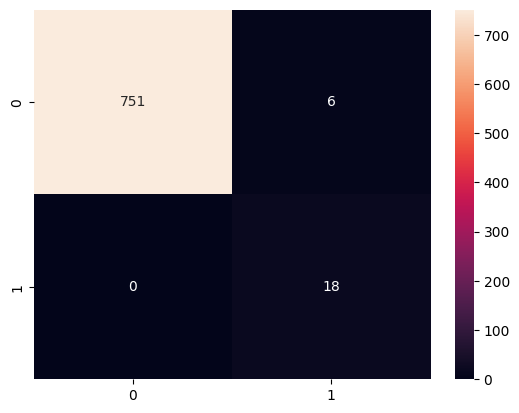

In [27]:
# Confusion Matrix
y_pred = best_rf.predict(X_test_selected)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

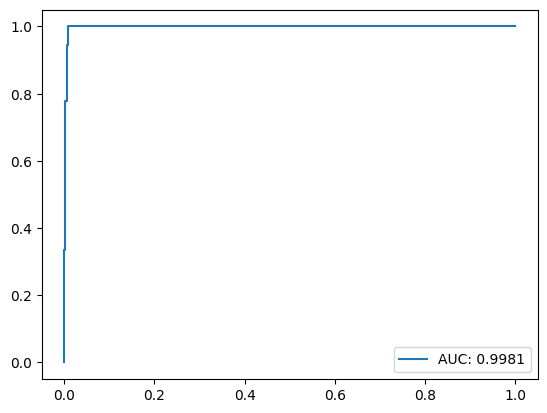

In [30]:
auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test_selected)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test_selected)[:, 1])
plt.plot(fpr, tpr, label=f'AUC: {auc_score:.4f}')
plt.legend()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'price_max'),
  Text(1, 0, 'price_std'),
  Text(2, 0, 'price_mean'),
  Text(3, 0, 'price_iqr'),
  Text(4, 0, 'price_min'),
  Text(5, 0, 'market_cap_std'),
  Text(6, 0, 'market_cap_max'),
  Text(7, 0, 'market_cap_mean'),
  Text(8, 0, 'market_cap_iqr'),
  Text(9, 0, 'market_cap_min')])

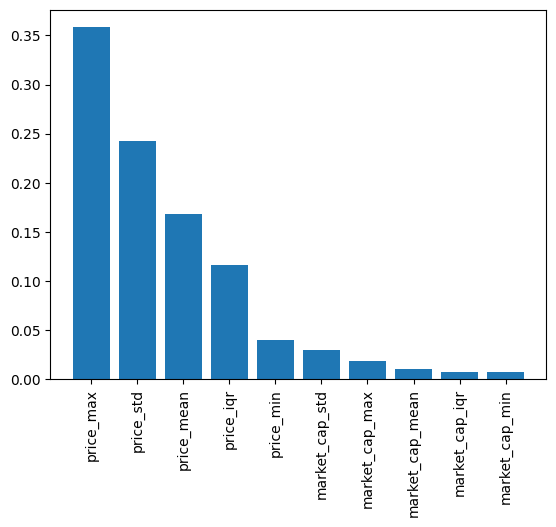

In [31]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X_train.columns[selector.get_support()][indices], importances[indices])
plt.xticks(rotation=90)


#Conclusiones del Modelo
* observamos que puede clasificar facilmente solo con los datos estadisticos del precio con una presicion alta pero en nuestro caso no sabremos este dato hasta luego de la finalizacion del halving por tanto vamos a trabajar con el valor promedio de valor que si podriamos estimar a lo largo de unos meses previo al inicio del bullrun